# Warranty Claims

## Business Problem

This is the problem facing by the organizations. To understand whether the claim is a genuine claim or a fraudulent claim based on different independent variables.

This dataset is having 19 explanatory variables to support whether the claim is fraud or not.

## Objective

The objective of the analysis is to predict an item when sold, what is the probability that customer would file fraudulent  / Genuine warranty and to understand important factors associated with them

## Variables

1. Region - Customer region details
2. State - Current location of customer
3. Area - Area_Urban/rural
4. City- Customers current located city
5. Consumer_profile- Customer's work profile
6. Product_category- Product category
7. Product_type- Type of the product_Tv/Ac
8. AC_1001_Issue- 1001 is failure of Compressor in AC
9. AC_1002_Issue- 1002 is failure of Condenser Coil in AC
10. AC_1003_Issue- 1003 is failure of Evaporator Coil in AC
11. TV_2001_Issue- 2001 is failure of power supply in Tv
12. TV_2002_Issue- 2002 is failure of Inverter in Tv
13. TV_2003_Issue- 2003 is failure of Motherboard in Tv
14. claim_value- Customer's claim amount in Rs
15. Service_Centre- 7 Different service centers
16. Product_Age- Duration of the product purchased by customer
17. Purchased_from- From where product is purchased
18. Call_details- call duration in mins
19. Purpose- Purpose_compliant-Compliant raised by customer claim- claimed for the product Other- Other categories out of this
20. Fraud- '1'- fradulent claim, '0' Genuin claim

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
Warranty_claim = pd.read_csv("D:/Projects/Fraud - Warranty Claim/Warranty Claim.csv")
Warranty_claim.head()

,Unnamed: 0,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,...,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,0,South,Karnataka,Urban,Bangalore,Business,Entertainment,TV,0,0,...,1,2,0,15000.0,10,60,Manufacturer,0.5,Complaint,1
1,1,South,Karnataka,Rural,Bangalore,Business,Household,AC,1,1,...,0,0,0,20000.0,12,10,Dealer,1.0,Complaint,0
2,2,North,Haryana,Urban,Chandigarh,Personal,Household,AC,0,1,...,0,0,0,18000.0,14,10,Dealer,1.4,Claim,0
3,3,South,Tamil Nadu,Urban,Chennai,Business,Entertainment,TV,0,0,...,1,1,0,12000.0,16,20,Manufacturer,2.0,Complaint,0
4,4,North East,Jharkhand,Rural,Ranchi,Personal,Entertainment,TV,0,0,...,0,1,2,25000.0,15,6,Dealer,1.3,Claim,0


In [3]:
Warranty_claim.shape

(358, 21)

In [4]:
Warranty_claim.dtypes

Unnamed: 0            int64
Region               object
State                object
Area                 object
City                 object
Consumer_profile     object
Product_category     object
Product_type         object
AC_1001_Issue         int64
AC_1002_Issue         int64
AC_1003_Issue         int64
TV_2001_Issue         int64
TV_2002_Issue         int64
TV_2003_Issue         int64
Claim_Value         float64
Service_Centre        int64
Product_Age           int64
Purchased_from       object
Call_details        float64
Purpose              object
Fraud                 int64
dtype: object

In [5]:
Warranty_claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        358 non-null    int64  
 1   Region            358 non-null    object 
 2   State             358 non-null    object 
 3   Area              358 non-null    object 
 4   City              358 non-null    object 
 5   Consumer_profile  358 non-null    object 
 6   Product_category  358 non-null    object 
 7   Product_type      358 non-null    object 
 8   AC_1001_Issue     358 non-null    int64  
 9   AC_1002_Issue     358 non-null    int64  
 10  AC_1003_Issue     358 non-null    int64  
 11  TV_2001_Issue     358 non-null    int64  
 12  TV_2002_Issue     358 non-null    int64  
 13  TV_2003_Issue     358 non-null    int64  
 14  Claim_Value       358 non-null    float64
 15  Service_Centre    358 non-null    int64  
 16  Product_Age       358 non-null    int64  
 1

In [6]:
Warranty_claim.Fraud.value_counts()

0    323
1     35
Name: Fraud, dtype: int64

In [7]:
Warranty_claim.isnull().sum()

Unnamed: 0          0
Region              0
State               0
Area                0
City                0
Consumer_profile    0
Product_category    0
Product_type        0
AC_1001_Issue       0
AC_1002_Issue       0
AC_1003_Issue       0
TV_2001_Issue       0
TV_2002_Issue       0
TV_2003_Issue       0
Claim_Value         0
Service_Centre      0
Product_Age         0
Purchased_from      0
Call_details        0
Purpose             0
Fraud               0
dtype: int64

In [8]:
pd.DataFrame(Warranty_claim.nunique())

,0
Unnamed: 0,358
Region,8
State,20
Area,2
City,27
Consumer_profile,2
Product_category,2
Product_type,2
AC_1001_Issue,3
AC_1002_Issue,3


In [9]:
#Eliminating Unwanted columns

In [10]:
Warranty_claim.drop(Warranty_claim.columns[[0]], axis = 1, inplace = True)

In [11]:
Warranty_claim[0:3]

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,South,Karnataka,Urban,Bangalore,Business,Entertainment,TV,0,0,0,1,2,0,15000.0,10,60,Manufacturer,0.5,Complaint,1
1,South,Karnataka,Rural,Bangalore,Business,Household,AC,1,1,0,0,0,0,20000.0,12,10,Dealer,1.0,Complaint,0
2,North,Haryana,Urban,Chandigarh,Personal,Household,AC,0,1,2,0,0,0,18000.0,14,10,Dealer,1.4,Claim,0


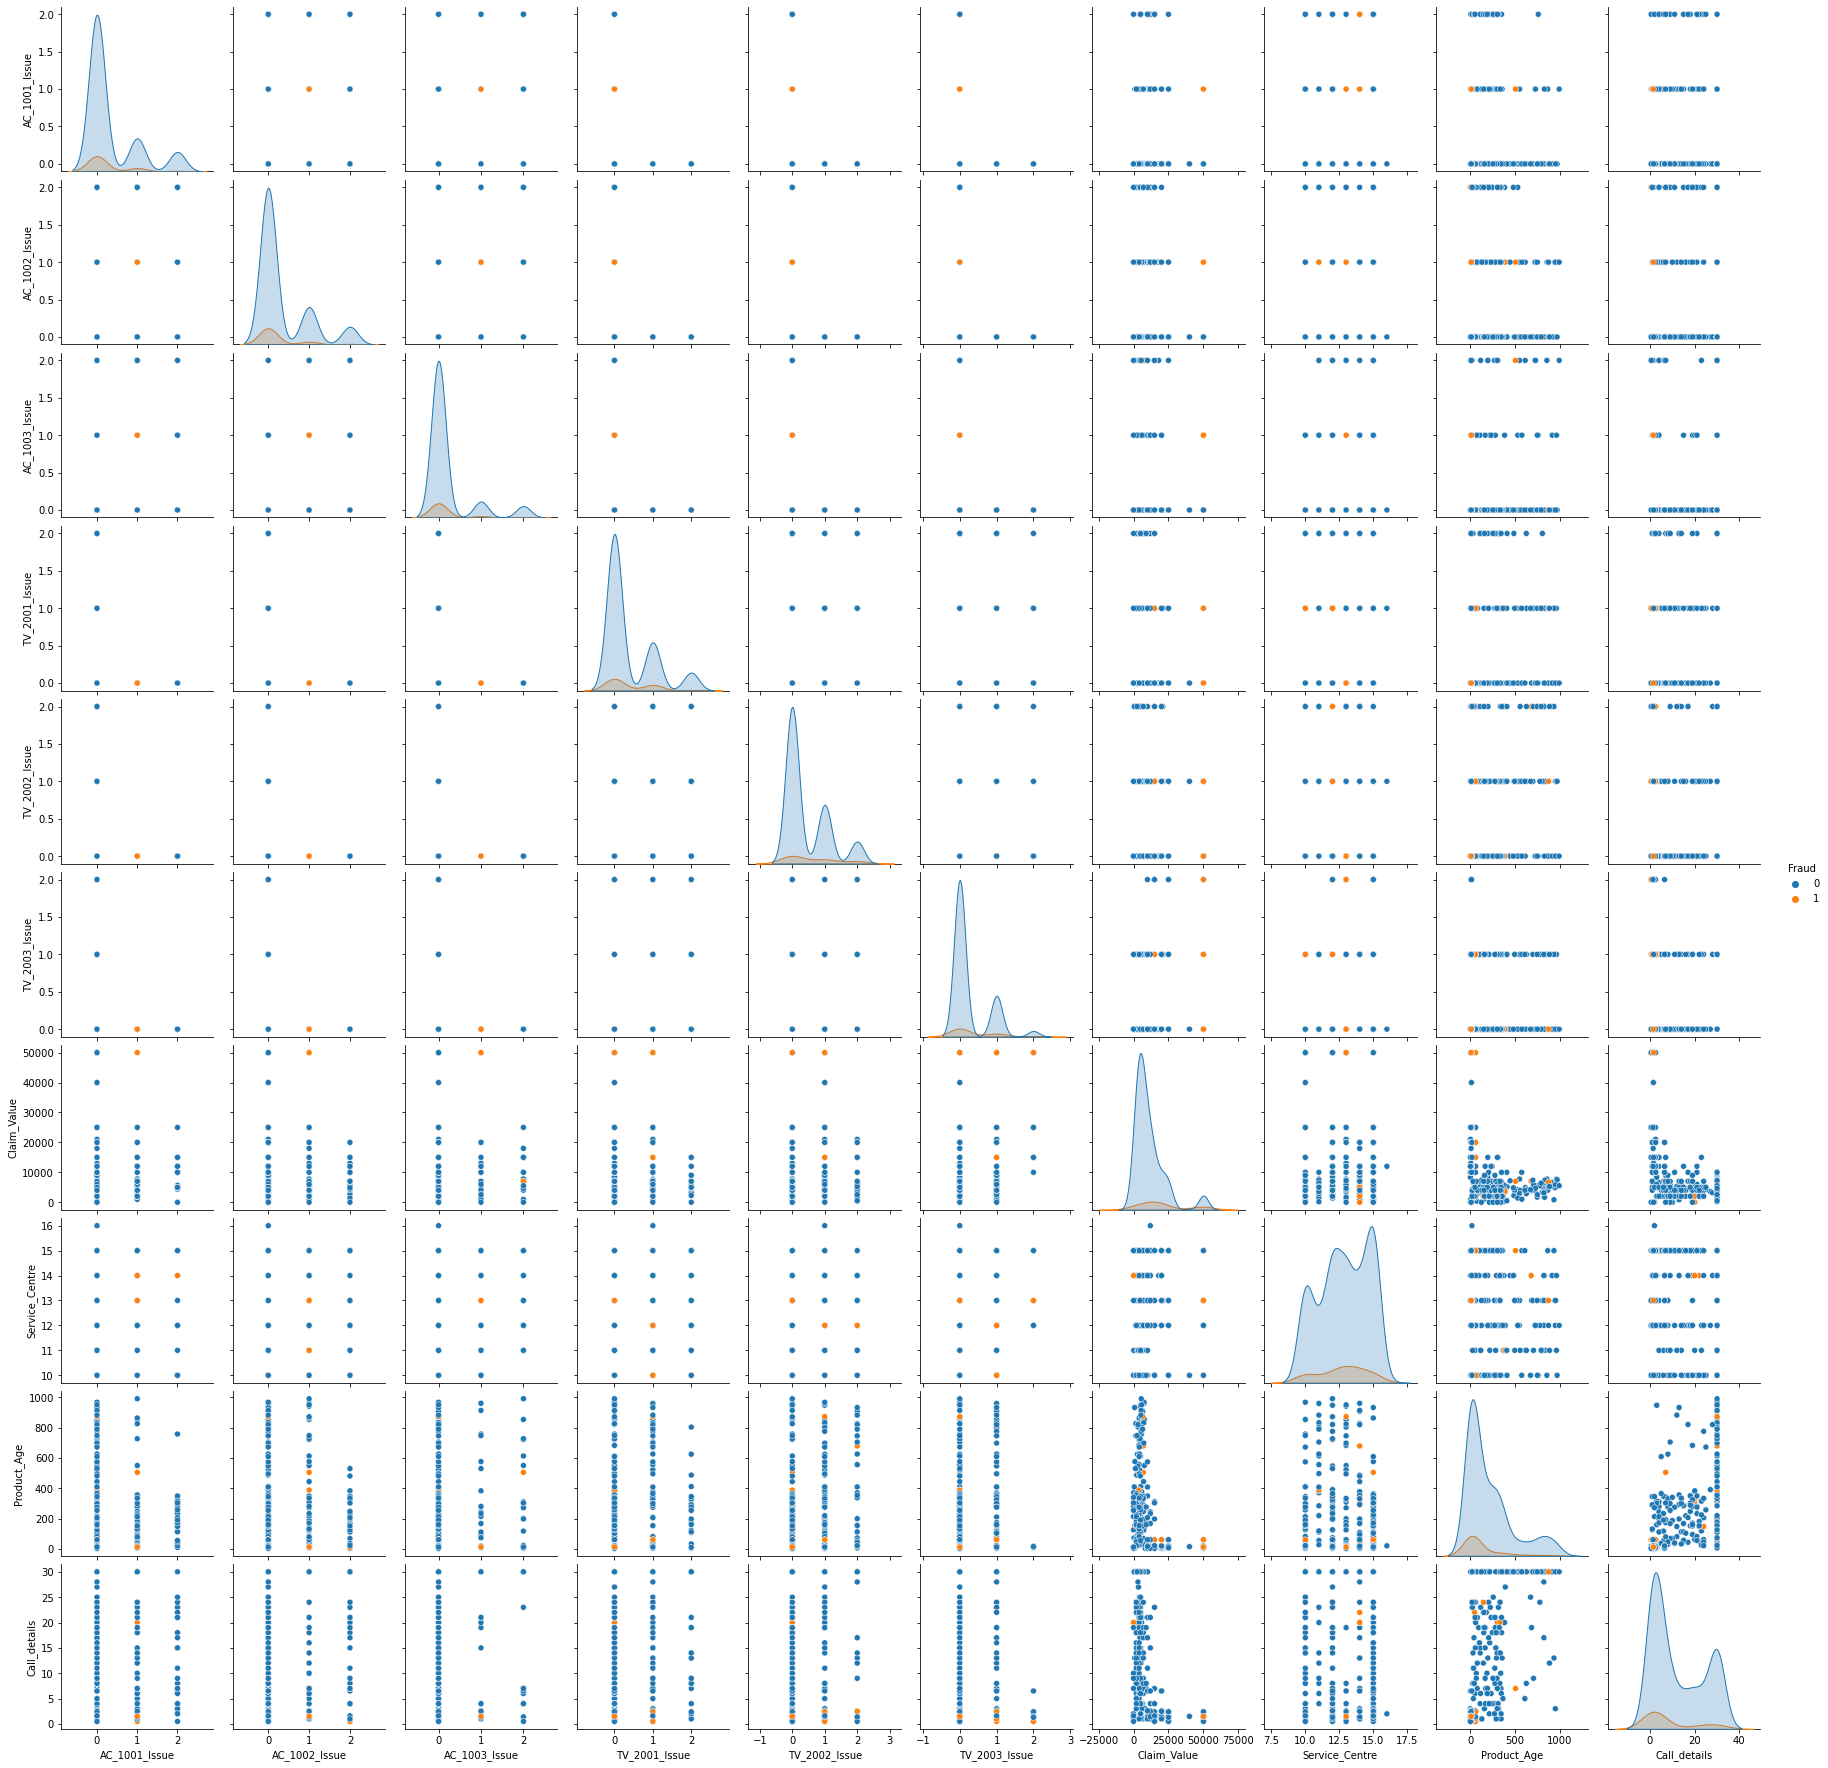

In [12]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=Warranty_claim, hue = 'Fraud')

In [13]:
#Checking for Dulpicates
print("There are {:,} duplications in our dataset.".format(Warranty_claim.duplicated().sum()))

There are 0 duplications in our dataset.


In [14]:
# Getting the barplot for the categorical columns 

In [15]:
# We will see how many unique value counts.
(Warranty_claim.Region.value_counts())

South         85
North East    53
South East    50
West          49
East          39
North         33
North West    27
South West    22
Name: Region, dtype: int64

<AxesSubplot:xlabel='Region', ylabel='count'>

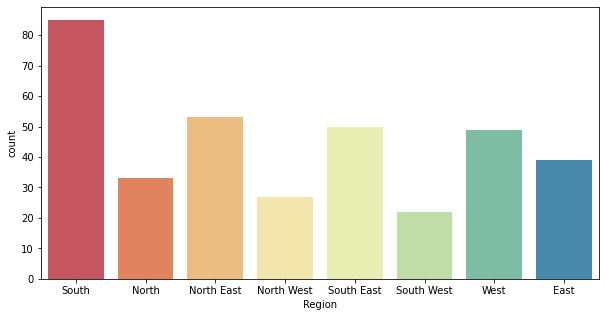

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x="Region",data=Warranty_claim, palette="Spectral")

<AxesSubplot:xlabel='Region'>

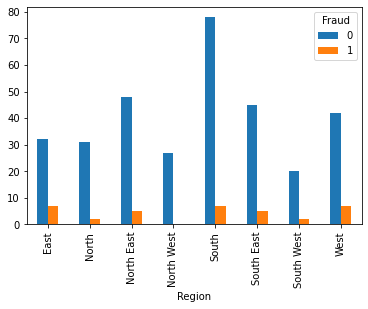

In [17]:
pd.crosstab(Warranty_claim.Region,Warranty_claim.Fraud).plot(kind="bar")

In [18]:
# We will see how many unique value counts.
(Warranty_claim.State.value_counts())

Andhra Pradesh       59
Tamil Nadu           46
Maharashtra          39
Karnataka            30
Gujarat              29
Kerala               28
Uttar Pradesh        24
Delhi                22
Bihar                19
West Bengal          19
Orissa               17
Goa                   5
Rajasthan             4
Madhya Pradesh        4
Jharkhand             4
Tripura               2
Jammu and Kashmir     2
Assam                 2
Himachal Pradesh      2
Haryana               1
Name: State, dtype: int64

<AxesSubplot:xlabel='State', ylabel='count'>

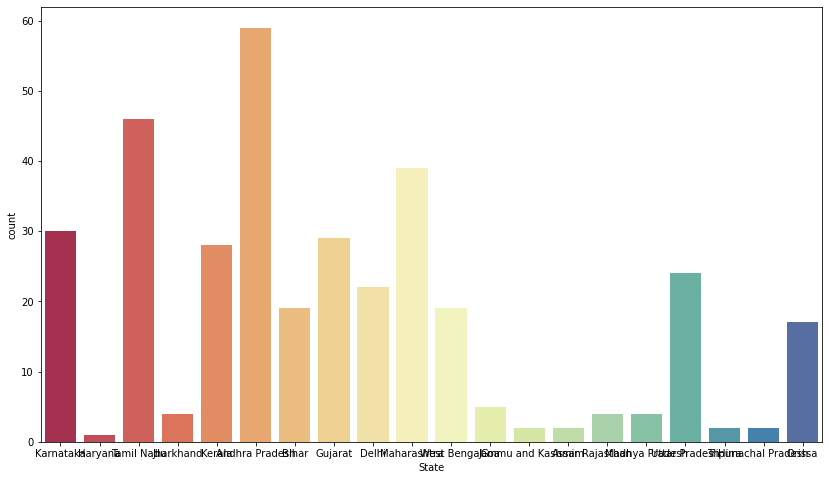

In [19]:
plt.figure(figsize=(14,8))
sns.countplot(x="State",data=Warranty_claim, palette="Spectral")

<AxesSubplot:xlabel='State'>

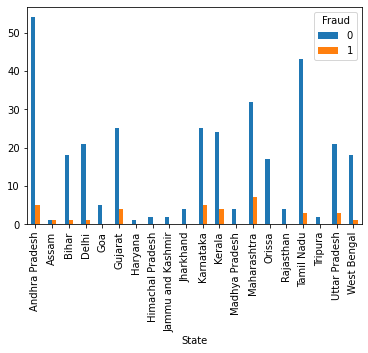

In [20]:
pd.crosstab(Warranty_claim.State,Warranty_claim.Fraud).plot(kind="bar")

In [21]:
# We will see how many unique value counts.
(Warranty_claim.Area.value_counts())

Urban    229
Rural    129
Name: Area, dtype: int64

<AxesSubplot:xlabel='Area', ylabel='count'>

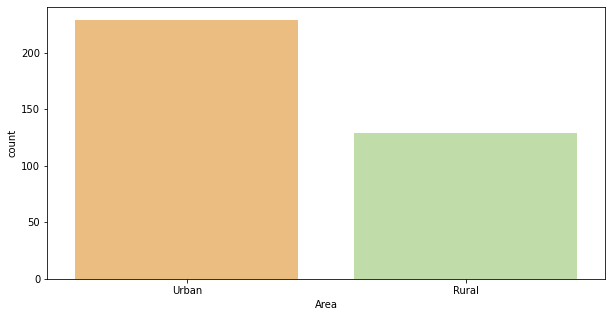

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x="Area",data=Warranty_claim, palette="Spectral")

<AxesSubplot:xlabel='Area'>

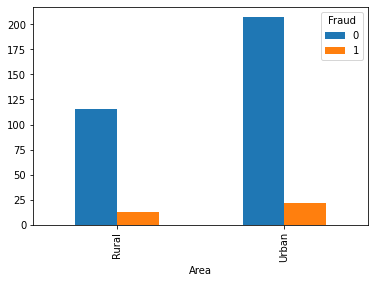

In [23]:
pd.crosstab(Warranty_claim.Area,Warranty_claim.Fraud).plot(kind="bar")

In [24]:
# We will see how many unique value counts.
(Warranty_claim.City.value_counts())

Chennai        46
Hyderabad      37
Mumbai         32
Bangalore      30
Kochi          28
Lucknow        21
Kolkata        19
Bhubaneswar    17
Vijayawada     16
Ahmedabad      16
New Delhi      15
Vadodara       13
Patna          10
Purnea          9
Pune            7
Delhi           7
Vizag           6
Panaji          5
Bhopal          4
Jaipur          4
Ranchi          4
Meerut          3
Agartala        2
Guwhati         2
Srinagar        2
Shimla          2
Chandigarh      1
Name: City, dtype: int64

<AxesSubplot:xlabel='City', ylabel='count'>

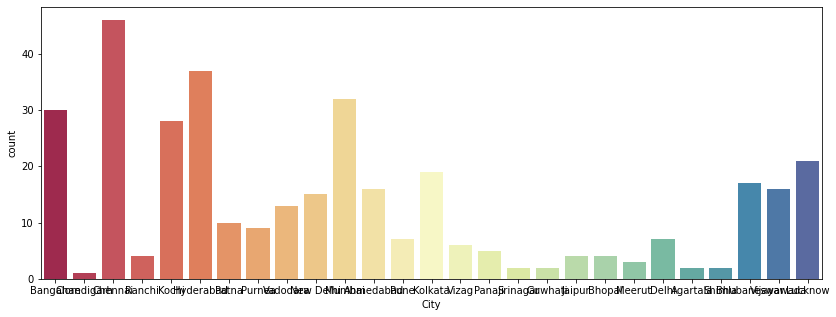

In [25]:
plt.figure(figsize=(14,5))
sns.countplot(x="City",data=Warranty_claim, palette="Spectral")

<AxesSubplot:xlabel='City'>

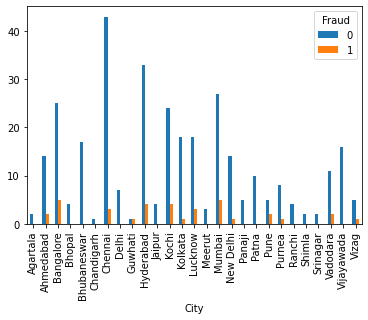

In [26]:
pd.crosstab(Warranty_claim.City,Warranty_claim.Fraud).plot(kind="bar")

In [27]:
# We will see how many unique value counts.
(Warranty_claim.Consumer_profile.value_counts())

Personal    224
Business    134
Name: Consumer_profile, dtype: int64

<AxesSubplot:xlabel='Consumer_profile', ylabel='count'>

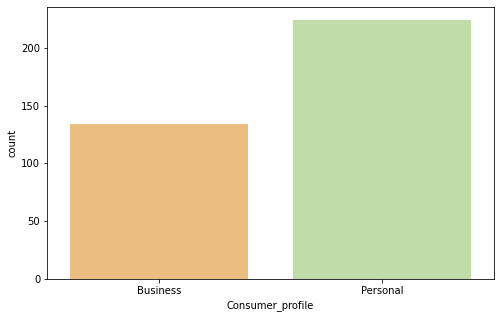

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(x="Consumer_profile",data=Warranty_claim, palette="Spectral")

<AxesSubplot:xlabel='Consumer_profile'>

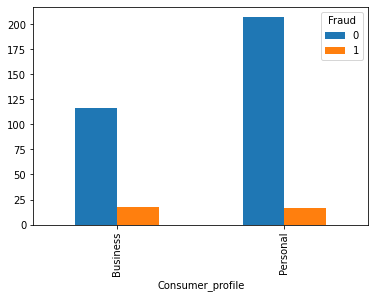

In [29]:
pd.crosstab(Warranty_claim.Consumer_profile,Warranty_claim.Fraud).plot(kind="bar")

In [30]:
# We will see how many unique value counts.
(Warranty_claim.Product_category.value_counts())

Entertainment    191
Household        167
Name: Product_category, dtype: int64

<AxesSubplot:xlabel='Product_category', ylabel='count'>

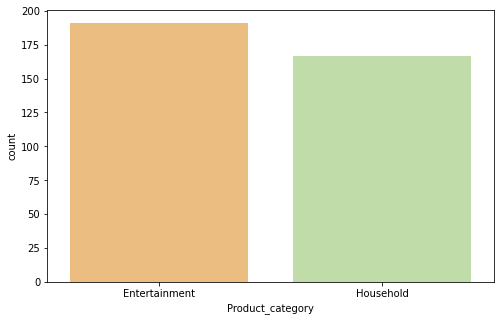

In [31]:
plt.figure(figsize=(8,5))
sns.countplot(x="Product_category",data=Warranty_claim, palette="Spectral")

<AxesSubplot:xlabel='Product_category'>

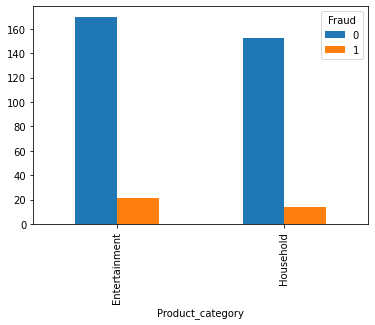

In [32]:
pd.crosstab(Warranty_claim.Product_category,Warranty_claim.Fraud).plot(kind="bar")

In [33]:
# We will see how many unique value counts.
(Warranty_claim.Product_category.value_counts())

Entertainment    191
Household        167
Name: Product_category, dtype: int64

<AxesSubplot:xlabel='Product_type', ylabel='count'>

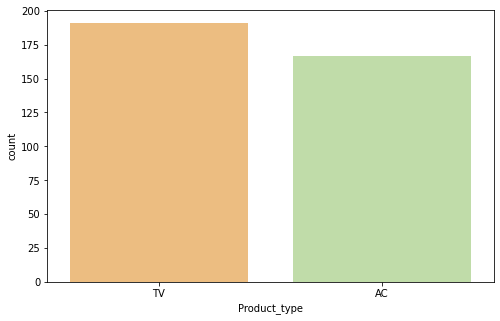

In [34]:
plt.figure(figsize=(8,5))
sns.countplot(x="Product_type",data=Warranty_claim, palette="Spectral")

<AxesSubplot:xlabel='Product_type'>

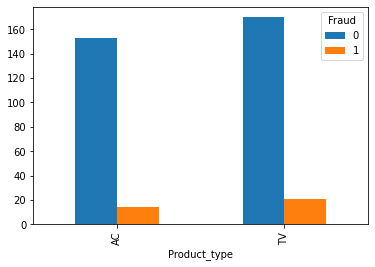

In [35]:
pd.crosstab(Warranty_claim.Product_type,Warranty_claim.Fraud).plot(kind="bar")

In [36]:
# We will see how many unique value counts.
(Warranty_claim.Service_Centre.value_counts())

15    90
12    69
13    64
10    60
14    49
11    25
16     1
Name: Service_Centre, dtype: int64

<AxesSubplot:xlabel='Service_Centre', ylabel='count'>

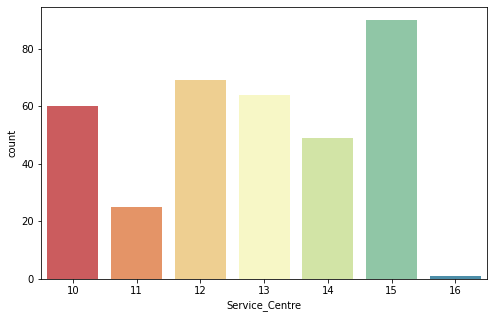

In [37]:
plt.figure(figsize=(8,5))
sns.countplot(x="Service_Centre",data=Warranty_claim, palette="Spectral")

<AxesSubplot:xlabel='Service_Centre'>

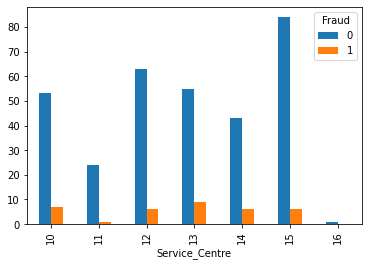

In [38]:
pd.crosstab(Warranty_claim.Service_Centre,Warranty_claim.Fraud).plot(kind="bar")

In [39]:
# We will see how many unique value counts.
(Warranty_claim.Purchased_from.value_counts())

Dealer          139
Manufacturer    135
Internet         84
Name: Purchased_from, dtype: int64

<AxesSubplot:xlabel='Purchased_from', ylabel='count'>

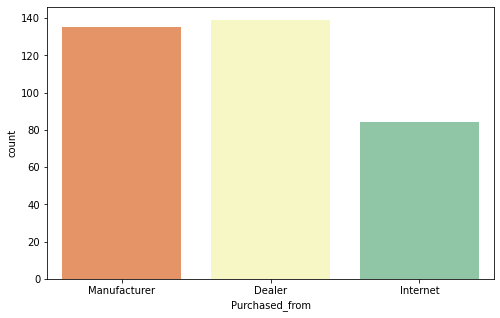

In [40]:
plt.figure(figsize=(8,5))
sns.countplot(x="Purchased_from",data=Warranty_claim, palette="Spectral")

<AxesSubplot:xlabel='Purchased_from'>

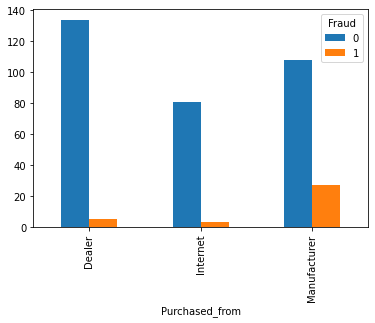

In [41]:
pd.crosstab(Warranty_claim.Purchased_from,Warranty_claim.Fraud).plot(kind="bar")

In [42]:
# We will see how many unique value counts.
(Warranty_claim.Purpose.value_counts())

Claim        171
Complaint    146
Other         41
Name: Purpose, dtype: int64

<AxesSubplot:xlabel='Purpose', ylabel='count'>

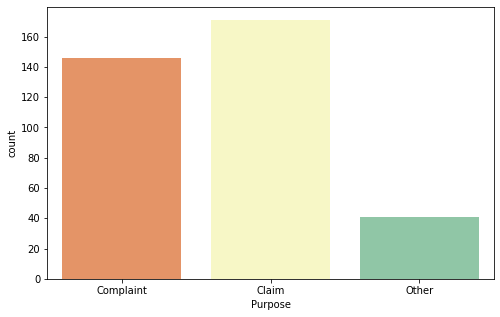

In [43]:
plt.figure(figsize=(8,5))
sns.countplot(x="Purpose",data=Warranty_claim, palette="Spectral")

<AxesSubplot:xlabel='Purpose'>

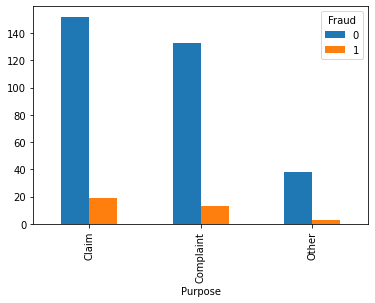

In [44]:
pd.crosstab(Warranty_claim.Purpose,Warranty_claim.Fraud).plot(kind="bar")

In [45]:
# We will see how many unique value counts.
(Warranty_claim.Fraud.value_counts())

0    323
1     35
Name: Fraud, dtype: int64

<AxesSubplot:xlabel='Fraud', ylabel='count'>

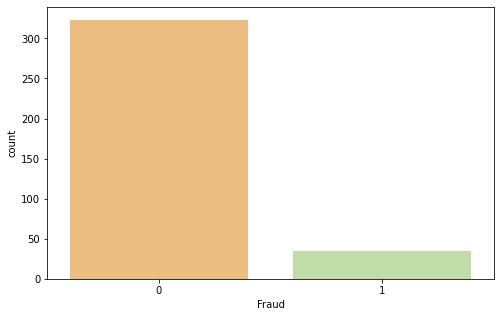

In [46]:
plt.figure(figsize=(8,5))
sns.countplot(x="Fraud",data=Warranty_claim, palette="Spectral")

<AxesSubplot:xlabel='Claim_Value', ylabel='Density'>

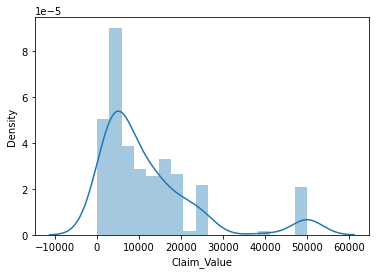

In [47]:
sns.distplot(Warranty_claim['Claim_Value'])

In [48]:
#Descriptive stat
Warranty_claim['Claim_Value'].describe()

count      358.000000
mean     11994.534916
std      12063.213579
min          0.000000
25%       4006.000000
50%       7194.000000
75%      15000.000000
max      50000.000000
Name: Claim_Value, dtype: float64

<AxesSubplot:xlabel='Product_Age', ylabel='Density'>

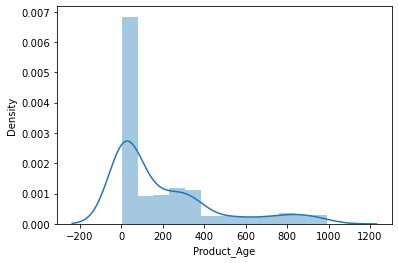

In [49]:
sns.distplot(Warranty_claim['Product_Age'])

In [50]:
#Descriptive stat
Warranty_claim['Product_Age'].describe()

count    358.000000
mean     201.843575
std      259.731564
min        3.000000
25%       14.000000
50%       60.000000
75%      303.750000
max      991.000000
Name: Product_Age, dtype: float64

<AxesSubplot:xlabel='Call_details', ylabel='Density'>

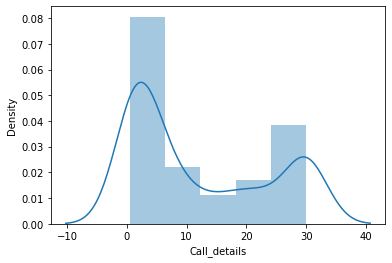

In [51]:
sns.distplot(Warranty_claim['Call_details'])

In [52]:
#Descriptive stat
Warranty_claim['Call_details'].describe()

count    358.000000
mean      11.931844
std       11.559474
min        0.500000
25%        1.600000
50%        6.500000
75%       23.000000
max       30.000000
Name: Call_details, dtype: float64

In [53]:
#Correlation
Warranty_claim.corr()

,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Call_details,Fraud
AC_1001_Issue,1.000000,0.468584,0.266681,-0.321085,-0.357181,-0.279346,-0.168205,0.066168,-0.005918,0.045816,-0.054376
AC_1002_Issue,0.468584,1.000000,0.480978,-0.325770,-0.362392,-0.283422,-0.116644,0.116185,0.068414,0.091954,-0.069450
AC_1003_Issue,0.266681,0.480978,1.000000,-0.234121,-0.260440,-0.203687,-0.008041,0.070839,0.106377,0.068399,-0.038005
TV_2001_Issue,-0.321085,-0.325770,-0.234121,1.000000,0.482737,0.388042,-0.167174,-0.009520,0.168359,0.115679,-0.003003
TV_2002_Issue,-0.357181,-0.362392,-0.260440,0.482737,1.000000,0.456304,-0.121435,-0.084317,0.247202,0.279644,0.086503
TV_2003_Issue,-0.279346,-0.283422,-0.203687,0.388042,0.456304,1.000000,0.075057,0.027963,0.056517,0.020613,0.066967
Claim_Value,-0.168205,-0.116644,-0.008041,-0.167174,-0.121435,0.075057,1.000000,-0.031916,-0.424868,-0.528135,0.236343
Service_Centre,0.066168,0.116185,0.070839,-0.009520,-0.084317,0.027963,-0.031916,1.000000,-0.123943,-0.120344,-0.023720
Product_Age,-0.005918,0.068414,0.106377,0.168359,0.247202,0.056517,-0.424868,-0.123943,1.000000,0.647403,-0.106918
Call_details,0.045816,0.091954,0.068399,0.115679,0.279644,0.020613,-0.528135,-0.120344,0.647403,1.000000,-0.105117


In [54]:
Warranty_claim[0:3]

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,South,Karnataka,Urban,Bangalore,Business,Entertainment,TV,0,0,0,1,2,0,15000.0,10,60,Manufacturer,0.5,Complaint,1
1,South,Karnataka,Rural,Bangalore,Business,Household,AC,1,1,0,0,0,0,20000.0,12,10,Dealer,1.0,Complaint,0
2,North,Haryana,Urban,Chandigarh,Personal,Household,AC,0,1,2,0,0,0,18000.0,14,10,Dealer,1.4,Claim,0


### As this data is imbalanced we will go with K fold and resampling techniques

In [55]:
# Declaring features & target
X = Warranty_claim.drop(['Fraud'], axis=1)
Y = Warranty_claim['Fraud']

In [56]:
# creating one hot encoding of the categorical columns.
X = pd.get_dummies(X, columns =['Region', 'State', 'Area', 'City', 'Consumer_profile', 'Product_category', 'Product_type','Service_Centre','Purchased_from','Purpose'])

In [57]:
X.head()

,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Product_Age,Call_details,Region_East,...,Service_Centre_13,Service_Centre_14,Service_Centre_15,Service_Centre_16,Purchased_from_Dealer,Purchased_from_Internet,Purchased_from_Manufacturer,Purpose_Claim,Purpose_Complaint,Purpose_Other
0,0,0,0,1,2,0,15000.0,60,0.5,0,...,0,0,0,0,0,0,1,0,1,0
1,1,1,0,0,0,0,20000.0,10,1.0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,1,2,0,0,0,18000.0,10,1.4,0,...,0,1,0,0,1,0,0,1,0,0
3,0,0,0,1,1,0,12000.0,20,2.0,0,...,0,0,0,1,0,0,1,0,1,0
4,0,0,0,0,1,2,25000.0,6,1.3,0,...,0,0,1,0,1,0,0,1,0,0


In [58]:
Y.head ()

0    1
1    0
2    0
3    0
4    0
Name: Fraud, dtype: int64

In [59]:
# LogisticRegression
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

kfold = KFold(n_splits=10, shuffle=False)

LogisticRegression = LogisticRegression(solver='lbfgs',random_state=7)

results = cross_val_score(LogisticRegression, X, Y, cv=kfold)
Log_acc=print(results.mean())

0.8877777777777778


In [60]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

kfold = KFold(n_splits=10, shuffle=False)

DecisionTreeClassifier = DecisionTreeClassifier(criterion = 'entropy',max_depth=3,random_state=7)

results = cross_val_score(DecisionTreeClassifier, X, Y, cv=kfold)
DT_acc=print(results.mean())

0.8742063492063492


In [61]:
# SVC
from sklearn.svm import SVC

kfold = KFold(n_splits=10, shuffle=False)

SVC = SVC(kernel="rbf",random_state=7)

results = cross_val_score(SVC, X, Y, cv=kfold)
SVC_acc=print(results.mean())

0.9019841269841269


In [62]:
# Bagged Decision Trees for Classification
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

kfold = KFold(n_splits=10, shuffle=False)
cart = DecisionTreeClassifier()
num_trees = 100
BaggingClassifier = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=7)
results = cross_val_score(BaggingClassifier, X, Y, cv=kfold)
Bagging_acc=print(results.mean())

0.849047619047619


In [63]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

num_trees = 50
max_features = 3
kfold = KFold(n_splits=10, shuffle=False)
RandomForestClassifier = RandomForestClassifier(n_estimators=num_trees, max_features=max_features, criterion="entropy",random_state=7)
results = cross_val_score(RandomForestClassifier, X, Y, cv=kfold)
RandomForest_acc=print(results.mean())

0.8657936507936508


In [64]:
# AdaBoost Classification
from sklearn.ensemble import AdaBoostClassifier

num_trees = 50
kfold = KFold(n_splits=10, shuffle=False)
AdaBoostClassifier = AdaBoostClassifier(n_estimators=num_trees, random_state=7)
results = cross_val_score(AdaBoostClassifier, X, Y, cv=kfold)
AdaBoost_acc=print(results.mean())

0.8434126984126984


In [65]:
# Naive bayes classification
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

kfold = KFold(n_splits=10, shuffle=False)
MultinomialNB = MB()
results = cross_val_score(MultinomialNB, X, Y, cv=kfold)
MultinomialNB_acc=print(results.mean())

0.5928571428571429


In [66]:
GaussianNB = GB()
results = cross_val_score(GaussianNB, X, Y, cv=kfold)
GaussianNB_acc=print(results.mean())

0.7221428571428572


### Feature Importance

[3.86838513e-02 1.42229611e-02 1.81480892e-02 1.78376874e-02
 3.17756867e-02 2.53580281e-02 8.04476881e-02 4.79338928e-02
 4.48844553e-02 1.70256630e-02 3.28996684e-03 9.91005089e-03
 6.08398253e-03 8.26076058e-03 1.24964351e-02 4.49209355e-03
 1.45921075e-02 8.01484042e-03 1.12025015e-02 1.56912453e-03
 2.96186448e-03 1.55138973e-04 8.26234533e-03 0.00000000e+00
 0.00000000e+00 5.53822925e-06 8.49364632e-04 8.11169204e-03
 1.57207760e-02 0.00000000e+00 1.82161932e-02 1.11916993e-03
 3.52508481e-05 7.23144493e-03 7.12058047e-06 1.28440213e-02
 4.17440652e-03 2.11434514e-02 2.22612556e-02 2.84823219e-05
 8.39522090e-03 9.54138958e-03 6.22442936e-05 1.30675026e-03
 0.00000000e+00 8.72813190e-03 5.99980834e-04 1.16612176e-02
 1.02492566e-02 9.62353977e-05 1.40382815e-02 3.02123380e-03
 1.53827841e-02 3.63722524e-04 1.40142583e-02 1.55997922e-03
 1.34554986e-05 2.77053397e-04 1.28988917e-02 8.00369795e-04
 5.34233417e-04 0.00000000e+00 7.25004557e-06 3.50218177e-03
 1.52318569e-03 8.089715

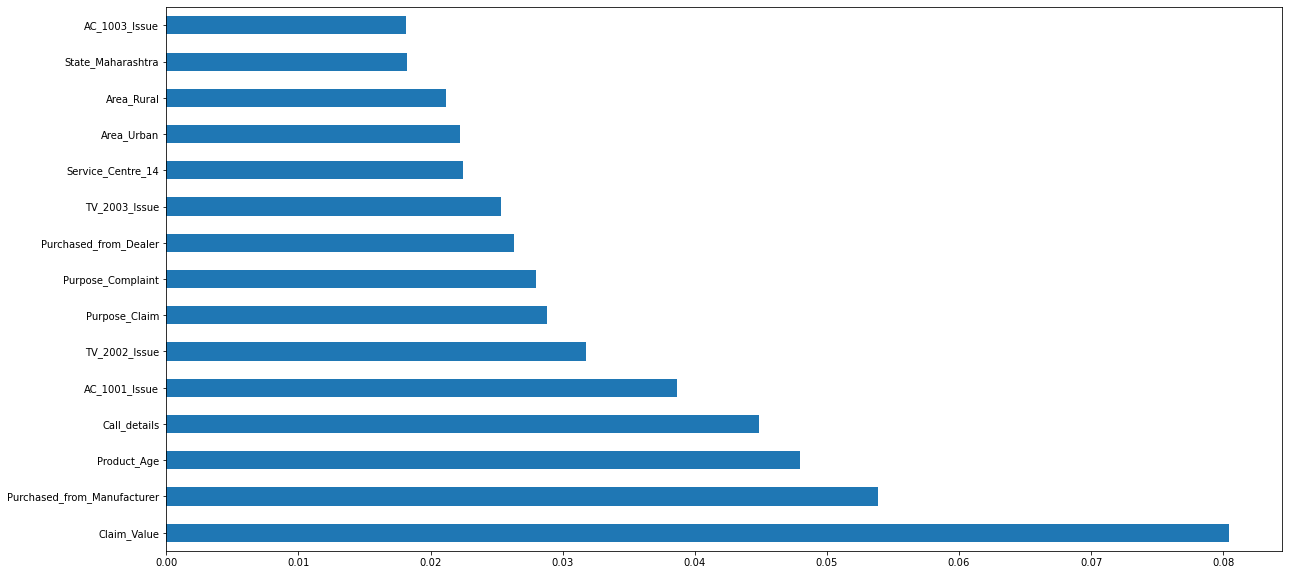

In [67]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh', figsize=(20,10))
plt.show()

In [68]:
# Plot the feature importance scores
feature_importance_scores = feat_importances.sort_values(ascending=True, inplace=False)
Features=pd.DataFrame(feature_importance_scores, columns=['Score'])
Features

,Score
City_Chandigarh,0.000000
City_Shimla,0.000000
State_Madhya Pradesh,0.000000
State_Himachal Pradesh,0.000000
State_Haryana,0.000000
...,...
AC_1001_Issue,0.038684
Call_details,0.044884
Product_Age,0.047934
Purchased_from_Manufacturer,0.053829


In [69]:
Features.value_counts()

Score   
0.000000    5
0.010249    1
0.015673    1
0.015383    1
0.014803    1
           ..
0.004174    1
0.003502    1
0.003290    1
0.003021    1
0.080448    1
Length: 81, dtype: int64

In [89]:
## Using PCA instead of eleminating columns

In [70]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 25)
X_new = pca.fit_transform(X)

In [71]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([9.99619590e-01, 3.79889726e-04, 4.61494132e-07, 1.26960415e-08,
       3.86668443e-09, 3.57827023e-09, 3.42902617e-09, 2.60896115e-09,
       2.58710032e-09, 2.38854967e-09, 2.10580162e-09, 1.91363171e-09,
       1.82724999e-09, 1.71781424e-09, 1.63370195e-09, 1.44706495e-09,
       1.39474742e-09, 1.31047546e-09, 1.19640030e-09, 1.13573964e-09,
       1.07895349e-09, 1.00963942e-09, 9.50094959e-10, 8.84303166e-10,
       7.67793882e-10])

In [72]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 10)*100)
var1

array([99.96195898, 99.99994795, 99.9999941 , 99.99999537, 99.99999576,
       99.99999612, 99.99999646, 99.99999672, 99.99999698, 99.99999722,
       99.99999743, 99.99999762, 99.9999978 , 99.99999797, 99.99999813,
       99.99999827, 99.99999841, 99.99999854, 99.99999866, 99.99999877,
       99.99999888, 99.99999898, 99.99999908, 99.99999917, 99.99999925])

# Resampling - SMOTE(Synthetic Minority Over Sampling Technique)

In [73]:
from imblearn.over_sampling import SMOTE
method = SMOTE(random_state = 7)

In [74]:
X_resampled, Y_resampled = method.fit_resample(X_new,Y)

In [75]:
X_resampled.shape

(646, 25)

In [76]:
Y_resampled.shape

(646,)

In [77]:
# LogisticRegression
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

kfold = KFold(n_splits=10, shuffle=False)

LogisticRegression_2 = LogisticRegression(solver='lbfgs',random_state=7)

results = cross_val_score(LogisticRegression_2, X_resampled, Y_resampled, cv=kfold)
print(results.mean())

0.6056490384615385


In [78]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, shuffle=False)
Random_Forest = RandomForestClassifier(n_estimators=num_trees, max_features=max_features, criterion="entropy",random_state=7)
results = cross_val_score(Random_Forest, X_resampled, Y_resampled, cv=kfold)
print(results.mean())

0.9322115384615385


In [79]:
# SVC
from sklearn.svm import SVC

kfold = KFold(n_splits=10, shuffle=False)

SVC_2 = SVC(kernel="rbf",random_state=7)

results = cross_val_score(SVC_2, X_resampled, Y_resampled, cv=kfold)
SVC_acc=print(results.mean())

0.7088701923076923


In [80]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

kfold = KFold(n_splits=10, shuffle=False)

DecisionTreeClassifier_2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=9,random_state=7)

results = cross_val_score(DecisionTreeClassifier_2, X_resampled, Y_resampled, cv=kfold)
DT_acc=print(results.mean())

0.8225240384615384


In [91]:
# Bagged Decision Trees for Classification
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

kfold = KFold(n_splits=10, shuffle=False)
cart = DecisionTreeClassifier()
num_trees = 100
BaggingClassifier_2 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=7)
results = cross_val_score(BaggingClassifier_2, X_resampled, Y_resampled, cv=kfold)
Bagging_acc=print(results.mean())

0.8998317307692307


## Selected Random Forest

In [81]:
Random_Forest.fit(X_new,Y)

RandomForestClassifier(criterion='entropy', max_features=3, random_state=7)

In [82]:
RandomForestClassifier=Random_Forest.predict(X_new)
RandomForestClassifier

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [83]:
pd.Series(RandomForestClassifier).value_counts()

0    330
1     28
dtype: int64

In [84]:
from sklearn import metrics
print(metrics.confusion_matrix(Y, RandomForestClassifier))

[[320   3]
 [ 10  25]]


In [85]:
pd.crosstab(Y,RandomForestClassifier)

col_0,0,1
Fraud,,
0,320,3
1,10,25


In [86]:
print(metrics.classification_report(Y, RandomForestClassifier))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       323
           1       0.89      0.71      0.79        35

    accuracy                           0.96       358
   macro avg       0.93      0.85      0.89       358
weighted avg       0.96      0.96      0.96       358



In [87]:
accuracies = cross_val_score(estimator = Random_Forest, X = X_new,\
     y = Y, cv = kfold)
print("Accuracy Mean {} Accuracy Variance \
     {}".format(accuracies.mean(),accuracies.std()))

Accuracy Mean 0.8657936507936508 Accuracy Variance      0.10556537130635034


In [88]:
#Accuracy Score
from sklearn.metrics import accuracy_score

accuracy_score(Y,RandomForestClassifier)

0.9636871508379888